# Naivibayes Algorithm on Obeysity Dataset

<b> Load Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [5]:
data = 'C:\\Users\\santhosh\\Downloads\\ObesityDataSet_raw_and_data_sinthetic.csv'

#df = pd.read_csv(data, header=None, sep=',\s')
df = pd.read_csv(data)
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df.shape

(2111, 17)

In [12]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
col_names = ['Age', 'Gender', 'Height', 'Weight', 'Alcohol', 'High_caloric_food', 'Vegetables_in_meals', 'Meals_per_day',
             'Calories_per_daily', 'Smoke', 'Water', 'Family_overweight', 'Phy_Activity', 'Time_for_devices', 'food_bet_meals', 'Transp', 'Obesity_level']

df.columns = col_names
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Alcohol', 'High_caloric_food',
       'Vegetables_in_meals', 'Meals_per_day', 'Calories_per_daily', 'Smoke',
       'Water', 'Family_overweight', 'Phy_Activity', 'Time_for_devices',
       'food_bet_meals', 'Transp', 'Obesity_level'],
      dtype='object')

In [16]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2111 non-null   float64
 1   Gender               2111 non-null   object 
 2   Height               2111 non-null   float64
 3   Weight               2111 non-null   float64
 4   Alcohol              2111 non-null   object 
 5   High_caloric_food    2111 non-null   object 
 6   Vegetables_in_meals  2111 non-null   float64
 7   Meals_per_day        2111 non-null   float64
 8   Calories_per_daily   2111 non-null   object 
 9   Smoke                2111 non-null   object 
 10  Water                2111 non-null   float64
 11  Family_overweight    2111 non-null   object 
 12  Phy_Activity         2111 non-null   float64
 13  Time_for_devices     2111 non-null   float64
 14  food_bet_meals       2111 non-null   object 
 15  Transp               2111 non-null   o

In [18]:
df.head()

,Age,Gender,Height,Weight,Alcohol,High_caloric_food,Vegetables_in_meals,Meals_per_day,Calories_per_daily,Smoke,Water,Family_overweight,Phy_Activity,Time_for_devices,food_bet_meals,Transp,Obesity_level
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<b> Data Clean

In [20]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['Gender', 'Alcohol', 'High_caloric_food', 'Calories_per_daily', 'Smoke', 'Family_overweight', 'food_bet_meals', 'Transp', 'Obesity_level']


In [22]:
# view the categorical variables

df[categorical].head()

,Gender,Alcohol,High_caloric_food,Calories_per_daily,Smoke,Family_overweight,food_bet_meals,Transp,Obesity_level
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [24]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Gender                0
Alcohol               0
High_caloric_food     0
Calories_per_daily    0
Smoke                 0
Family_overweight     0
food_bet_meals        0
Transp                0
Obesity_level         0
dtype: int64

In [26]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Gender
Male      1068
Female    1043
Name: count, dtype: int64
Alcohol
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
High_caloric_food
yes    1866
no      245
Name: count, dtype: int64
Calories_per_daily
no     2015
yes      96
Name: count, dtype: int64
Smoke
no     2067
yes      44
Name: count, dtype: int64
Family_overweight
yes    1726
no      385
Name: count, dtype: int64
food_bet_meals
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
Transp
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [28]:
df.duplicated().sum()

24

In [30]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

<b> Exploratory Data Analysis

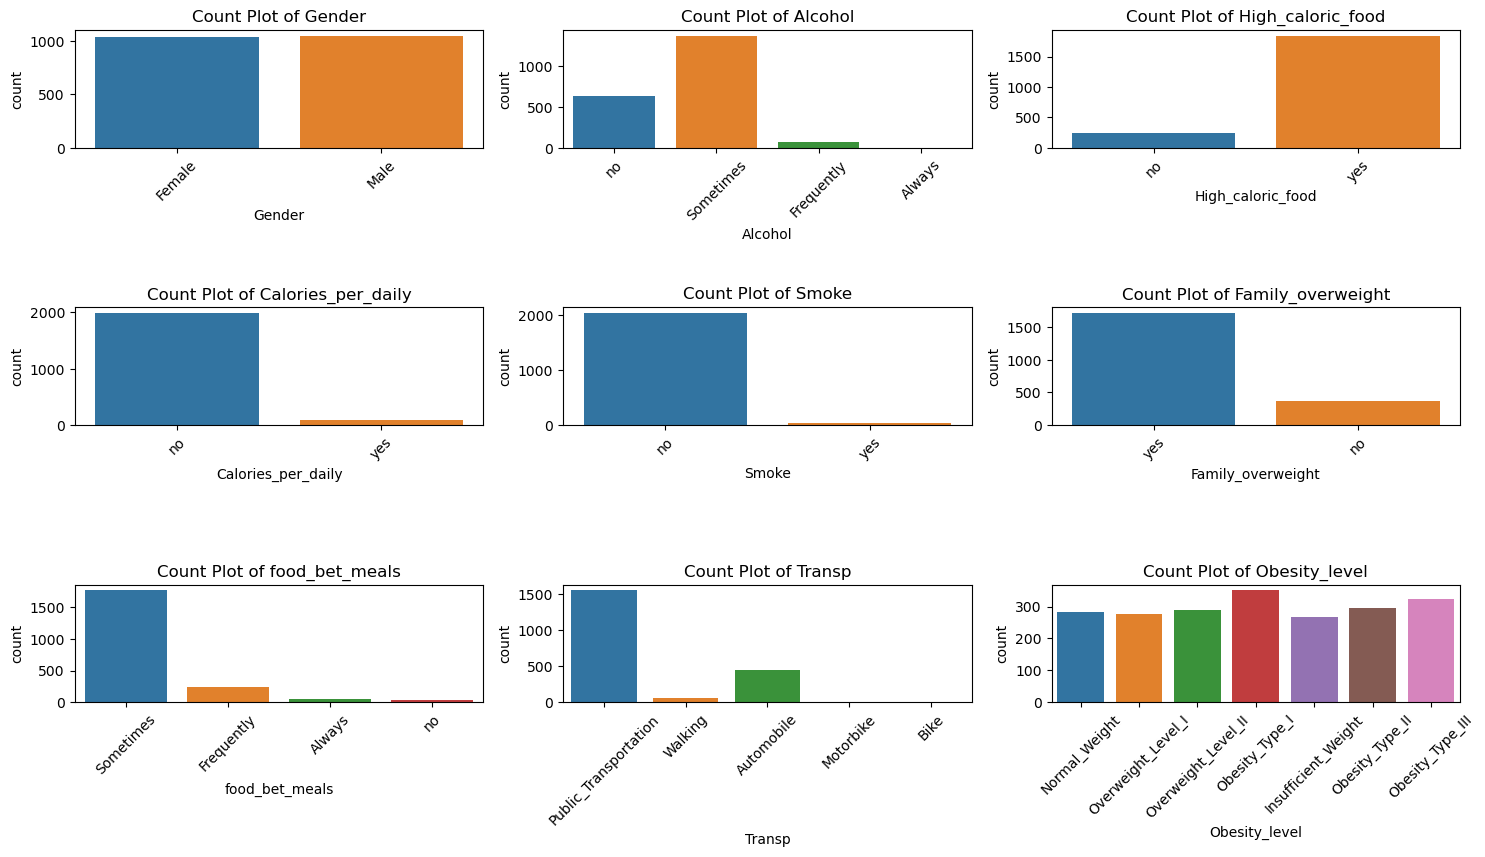

In [34]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical):
    plt.subplot(len(categorical) // 3 + 1, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


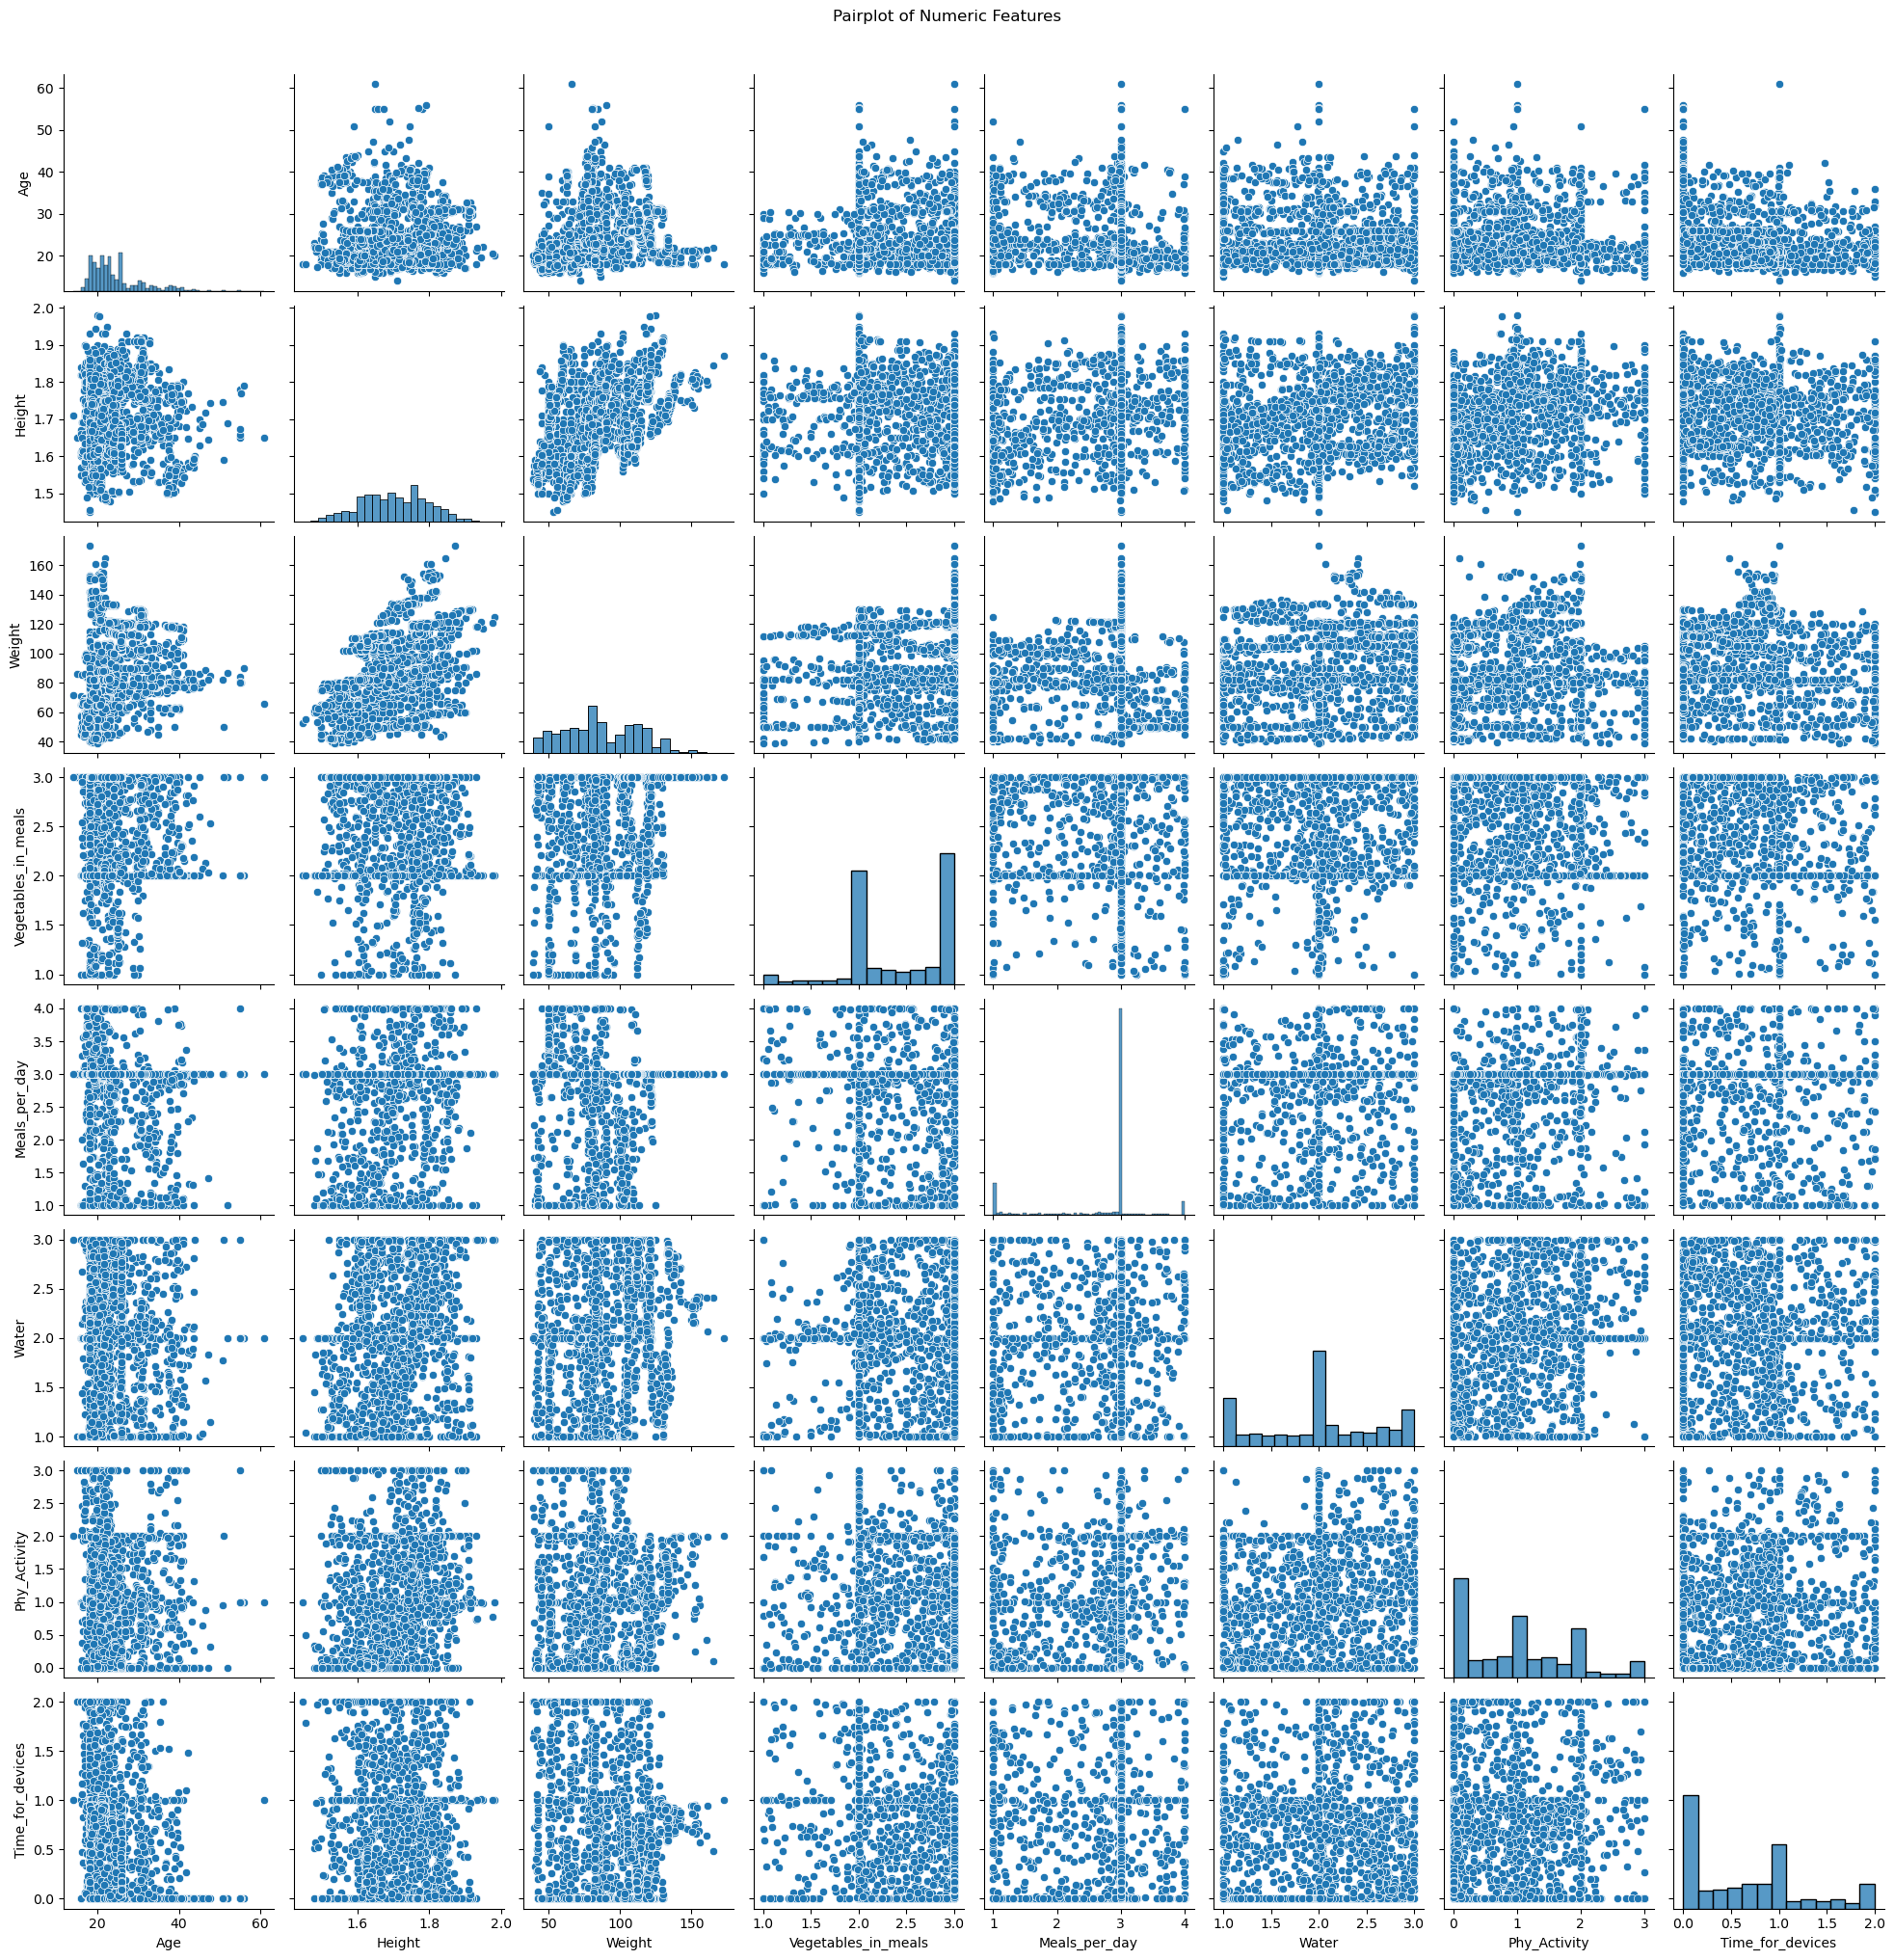

In [56]:
sns.pairplot(df)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

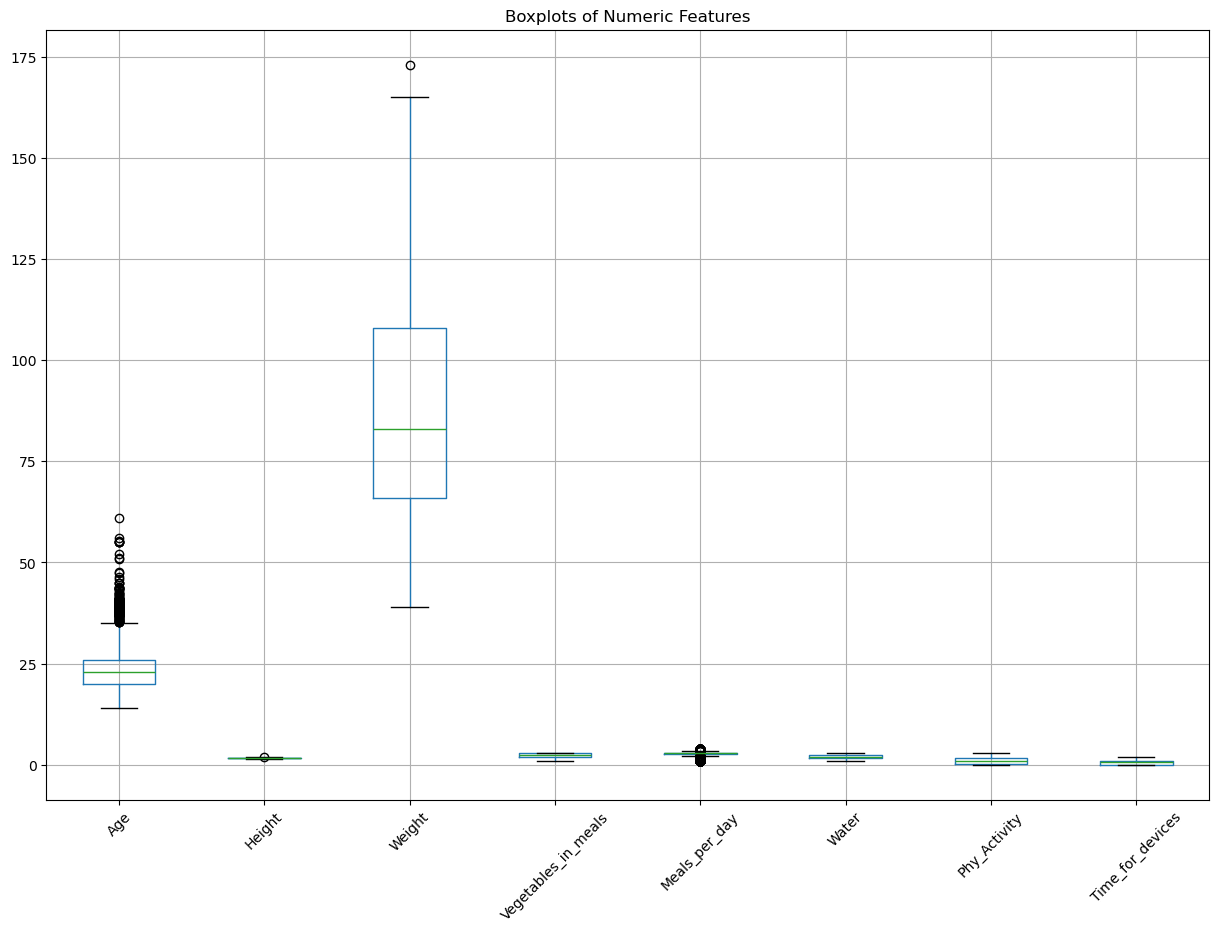

In [60]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Boxplots of Numeric Features')
plt.xticks(rotation=45)
plt.show()

In [64]:
X = df.drop(['Gender'], axis=1)

y = df['Gender']

<b> Train-Test Split

In [67]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [69]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1460, 16), (627, 16))

In [71]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Alcohol',
 'High_caloric_food',
 'Calories_per_daily',
 'Smoke',
 'Family_overweight',
 'food_bet_meals',
 'Transp',
 'Obesity_level']

In [73]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Age',
 'Height',
 'Weight',
 'Vegetables_in_meals',
 'Meals_per_day',
 'Water',
 'Phy_Activity',
 'Time_for_devices']

In [75]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Alcohol               0
High_caloric_food     0
Calories_per_daily    0
Smoke                 0
Family_overweight     0
food_bet_meals        0
Transp                0
Obesity_level         0
dtype: int64

In [77]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Alcohol               0
High_caloric_food     0
Calories_per_daily    0
Smoke                 0
Family_overweight     0
food_bet_meals        0
Transp                0
Obesity_level         0
dtype: int64

In [79]:
# check missing values in X_train

X_train.isnull().sum()

Age                    0
Height                 0
Weight                 0
Alcohol                0
High_caloric_food      0
Vegetables_in_meals    0
Meals_per_day          0
Calories_per_daily     0
Smoke                  0
Water                  0
Family_overweight      0
Phy_Activity           0
Time_for_devices       0
food_bet_meals         0
Transp                 0
Obesity_level          0
dtype: int64

In [81]:
# check missing values in X_test

X_test.isnull().sum()

Age                    0
Height                 0
Weight                 0
Alcohol                0
High_caloric_food      0
Vegetables_in_meals    0
Meals_per_day          0
Calories_per_daily     0
Smoke                  0
Water                  0
Family_overweight      0
Phy_Activity           0
Time_for_devices       0
food_bet_meals         0
Transp                 0
Obesity_level          0
dtype: int64

In [83]:
# print categorical variables

categorical

['Alcohol',
 'High_caloric_food',
 'Calories_per_daily',
 'Smoke',
 'Family_overweight',
 'food_bet_meals',
 'Transp',
 'Obesity_level']

In [85]:
X_train[categorical].head()

,Alcohol,High_caloric_food,Calories_per_daily,Smoke,Family_overweight,food_bet_meals,Transp,Obesity_level
1511,no,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
315,Sometimes,yes,no,no,no,Always,Public_Transportation,Normal_Weight
977,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Overweight_Level_II
1159,no,yes,no,no,yes,Sometimes,Automobile,Overweight_Level_II
868,Sometimes,yes,no,no,no,Sometimes,Public_Transportation,Overweight_Level_I


<b> Model Evaluation technique

In [87]:
# import category encoders

import category_encoders as ce

In [89]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Alcohol', 'High_caloric_food', 'Calories_per_daily', 'Smoke', 'Family_overweight', 'food_bet_meals', 'Transp', 'Obesity_level'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [91]:
X_train.head()

,Age,Height,Weight,Alcohol_1,Alcohol_2,Alcohol_3,Alcohol_4,High_caloric_food_1,High_caloric_food_2,Vegetables_in_meals,...,Transp_3,Transp_4,Transp_5,Obesity_level_1,Obesity_level_2,Obesity_level_3,Obesity_level_4,Obesity_level_5,Obesity_level_6,Obesity_level_7
1511,18.880610,1.804160,104.406820,1,0,0,0,1,0,2.000000,...,0,0,0,1,0,0,0,0,0,0
315,26.000000,1.700000,72.000000,0,1,0,0,1,0,2.000000,...,0,0,0,0,1,0,0,0,0,0
977,21.180346,1.773766,89.282820,0,1,0,0,1,0,2.010684,...,0,0,0,0,0,1,0,0,0,0
1159,34.647036,1.769499,85.000000,1,0,0,0,1,0,2.802696,...,0,0,0,0,0,1,0,0,0,0
868,21.837058,1.558045,63.597633,0,1,0,0,1,0,2.539150,...,0,0,0,0,0,0,1,0,0,0


In [93]:
X_train.shape

(1460, 36)

In [95]:
X_test.head()

,Age,Height,Weight,Alcohol_1,Alcohol_2,Alcohol_3,Alcohol_4,High_caloric_food_1,High_caloric_food_2,Vegetables_in_meals,...,Transp_3,Transp_4,Transp_5,Obesity_level_1,Obesity_level_2,Obesity_level_3,Obesity_level_4,Obesity_level_5,Obesity_level_6,Obesity_level_7
305,23.000000,1.750000,120.000000,0,1,0,0,1,0,2.00000,...,0,0,0,0,0,0,0,0,0,1
386,18.000000,1.590000,53.000000,1,0,0,0,0,1,1.00000,...,0,0,0,0,1,0,0,0,0,0
1021,21.673150,1.500000,63.652330,1,0,0,0,0,1,2.00000,...,0,0,0,0,0,1,0,0,0,0
1625,25.341399,1.786997,115.025361,0,1,0,0,1,0,1.99953,...,0,0,0,0,0,0,0,0,0,1
270,23.000000,1.820000,107.000000,0,1,0,0,1,0,2.00000,...,0,0,0,1,0,0,0,0,0,0


In [97]:
X_test.shape

(627, 36)

In [99]:
cols = X_train.columns

In [103]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [105]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [107]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [109]:
X_train.head()

,Age,Height,Weight,Alcohol_1,Alcohol_2,Alcohol_3,Alcohol_4,High_caloric_food_1,High_caloric_food_2,Vegetables_in_meals,...,Transp_3,Transp_4,Transp_5,Obesity_level_1,Obesity_level_2,Obesity_level_3,Obesity_level_4,Obesity_level_5,Obesity_level_6,Obesity_level_7
0,-0.629127,0.757968,0.524037,1.0,-1.0,0.0,0.0,0.0,0.0,-0.428902,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.509286,0.000000,-0.256924,0.0,0.0,0.0,0.0,0.0,0.0,-0.428902,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.261392,0.536792,0.159569,0.0,0.0,0.0,0.0,0.0,0.0,-0.418219,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.891973,0.505742,0.056359,1.0,-1.0,0.0,0.0,0.0,0.0,0.373794,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.156382,-1.033001,-0.459410,0.0,0.0,0.0,0.0,0.0,0.0,0.110247,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [111]:
y_test

305       Male
386     Female
1021    Female
1625      Male
270       Male
         ...  
1220      Male
482     Female
1349      Male
660     Female
87        Male
Name: Gender, Length: 627, dtype: object

<b> Applying Algorithm

In [115]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [117]:
y_pred = gnb.predict(X_test)

y_pred

array(['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',


In [119]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#{0:0.4f}: This is a string formatting syntax. 
#It specifies that the value to be printed (accuracy_score(y_test, y_pred)) 
#should be displayed as a floating-point number (f) with four decimal places (0.4f).
#The {0} is a placeholder for the first argument passed to the format method.

Model accuracy score: 0.6475


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

In [122]:
#Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['Female', 'Female', 'Female', ..., 'Female', 'Female', 'Male'],
      dtype='<U6')

In [124]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6575


In [126]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0][0])

print('\nTrue Negatives(TN) = ', cm[1][1])

print('\nFalse Positives(FP) = ', cm[0][1])

print('\nFalse Negatives(FN) = ', cm[1][0])

Confusion matrix

 [[292  10]
 [211 114]]

True Positives(TP) =  292

True Negatives(TN) =  114

False Positives(FP) =  10

False Negatives(FN) =  211


<Axes: >

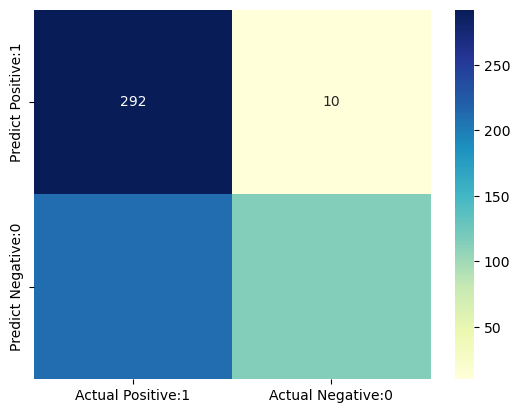

In [128]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<b>Predicted Values

In [130]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.58      0.97      0.73       302
        Male       0.92      0.35      0.51       325

    accuracy                           0.65       627
   macro avg       0.75      0.66      0.62       627
weighted avg       0.76      0.65      0.61       627

